# **ASIAN DRAMA - ANALYSIS AND RECOMMENDATION**

**Aim and Objective:**

The aim of this project is to understand and visualize the trends in Asian shows including Korean, Chinese, Japan, Thailand and so on. The analysis includes the current pattern of these shows, increase in the viewership over the last two decades, impact of factors such as Network show is casted on, Genre of the show, Day of the week on which the show is aired and so on. The project concludes with a recommendation system which recommends new Korean Dramas to the user based on their choice of Genre or Actor or similar to their previously watched shows.

# **Introduction:**

The global popularity of Asian dramas and movies has been significantly influenced by the Korean Wave (Hallyu), a cultural phenomenon that has brought Korean entertainment, music, and fashion to the forefront of global attention. Originating in the late 1990s and early 2000s, the Korean Wave gained momentum with the rise of iconic dramas such as Winter Sonata and Boys Over Flowers, captivating international audiences with their compelling narratives, emotional depth, and high production quality. This cultural export has since expanded to include streaming platforms like Netflix and Viki, which have made Asian content, especially Korean dramas, accessible to viewers worldwide. The growing influence of Hallyu has also fueled interest in other Asian dramas and movies, fostering cross-cultural appreciation and a global fan base that transcends linguistic and geographical boundaries. This project explores these trends within the dataset, offering insights into how the Korean Wave and other cultural influences shape audience preferences and viewing habits.


# **Data Cleaning**

In [ ]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the 5000 asian dramas from Kaggle which is extracted from MyDramaList
df = pd.read_csv('/content/Top_5000_popular_drama_details_from_mydramalist.csv')
df.head()

,Unnamed: 0,name,content,no_of_reviews,no_of_viewers,aka_names,screenwriter,director,genres,tags,...,main_role,support_role,no_of_extracted_reviews,Total_sentences,POSITIVE_people_sentiment,POSITIVE_sentences,NEGATIVE_people_sentiment,NEGATIVE_sentences,reviewer_location_info,reviewer_gender_info
0,0,goblin,Kim Shin was once an unbeatable general in Gor...,464.0,198650.0,"쓸쓸하고 찬란하神-도깨비 , Dokkaebi , Sseulsseulhago Chal...",Kim Eun Sook,Lee Eung Bok,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Older Man/Younger Woman, Intersp...",...,"Gong Yoo, Kim Go Eun, Lee Dong Wook, Yoo In Na...","Lee El, Kim Sung Kyum, Kim Byung Chul, Jo Woo...",422,6390,grim reaper - (sunny; bromance; shin; relation...,3226.0,"age gap - (lead; issue), grim reaper - (sunny)...",1331.0,"Counter({'': 238, 'usa': 14, 'united states': ...","Counter({'female': 318, '': 59, 'male': 44})"
1,1,strong woman do bong soon,"Do Bong Soon is a petite, unemployed woman who...",345.0,184710.0,"Himsseonyeoja Dobongsun , Powerful Woman Do Bo...",Baek Mi Kyung,Lee Hyung Min,"Action, Comedy, Romance, Supernatural","Strong Female Lead, Female Lead Action Scenes,...",...,"Park Bo Young, Park Hyung Sik, Kim Ji Soo","Jun Suk Ho, Shim Hye Jin, Yoo Jae Myung, Ahn W...",317,4615,female lead - (male; badass; amazing; characte...,2236.0,"serial killer - (plot; gangster), female lead,...",1235.0,"Counter({'': 197, 'united states': 10, 'usa': ...","Counter({'female': 228, '': 57, 'male': 32})"
2,2,weightlifting fairy kim bok joo,Bok Joo is a weightlifter who is pursuing her ...,267.0,167702.0,"Weightlifting Fairy Kim Bok-ju , Weightlifting...","Yang Hee Seung, Kim Soo Jin","Oh Hyun Jong, Nam Sung Woo","Comedy, Romance, Life, Sports","Friends To Lovers, Weightlifting, Strong Femal...",...,"Lee Sung Kyung, Nam Joo Hyuk, Lee Jae Yoon, Ky...","Cho Hye Jung, Lee Joo Young, Ji Il Joo, Yoo J...",246,3819,"love story - (character; beautiful), female le...",2139.0,"watch drama, female lead, male lead, character...",741.0,"Counter({'': 134, 'usa': 9, 'india': 4, 'phili...","Counter({'female': 176, '': 44, 'male': 26})"
3,3,descendants of the sun,A love story that develops between a surgeon a...,270.0,167287.0,"Taeyangeui Huye , The Sun's Descendants , Taey...","Kim Eun Sook, Kim Won Seok","Baek Sang Hoon, Lee Eung Bok","Action, Comedy, Romance, Melodrama","Hardworking Male Lead, Multiple Couples, Broma...",...,"Song Joong Ki, Song Hye Kyo, Jin Goo, Kim Ji Won","Lee Seung Joon, Seo Jung Yeon, Park Hwan Hee, ...",252,3728,"watch drama - (start; want; recommend), second...",1797.0,"watch drama - (time), female lead, last episod...",816.0,"Counter({'': 143, 'india': 8, 'usa': 6, 'unite...","Counter({'female': 193, '': 35, 'male': 24})"
4,4,w,"Oh Sung Moo, the father of cardiothoracic surg...",285.0,159860.0,"W – Two Worlds , W-두 개의 세계 , W – Two Worlds Apart",Song Jae Jung,Jeong Dae Yun,"Thriller, Comedy, Romance, Fantasy","Parallel Dimension, Gun Violence, Crossworlds ...",...,"Han Hyo Joo, Lee Jong Suk","Kim Eui Sung, Lee Tae Hwan, Jung Eugene, Lee S...",265,4664,"watch drama - (recommend), love story, really ...",1925.0,"second half - (drama), watch drama - (never), ...",1167.0,"Counter({'': 151, 'usa': 7, 'india': 6, 'phili...","Counter({'female': 196, '': 48, 'male': 21})"


In [ ]:
import re

# Function to clean and parse `reviewer_gender_info` column
def clean_and_parse_counter(counter_string):
    # Remove "Counter({" and "})" from the string
    cleaned_string = re.sub(r'Counter\(\{|\}\)', '', counter_string)
    # Split the string into key-value pairs
    items = [item.strip() for item in cleaned_string.split(',')]
    # Convert to a dictionary
    parsed_dict = {}
    for item in items:
        if ':' in item:
            key, value = item.split(':')
            parsed_dict[key.strip("'\" ")] = int(value.strip())
    return parsed_dict

# Apply the function and create new gender columns
df['reviewer_gender_dict'] = df['reviewer_gender_info'].apply(
    lambda x: clean_and_parse_counter(x) if isinstance(x, str) else {}
)
df['female_reviewers'] = df['reviewer_gender_dict'].apply(
    lambda x: x.get('female', 0)
)
df['male_reviewers'] = df['reviewer_gender_dict'].apply(
    lambda x: x.get('male', 0)
)
df['unknown_reviewers'] = df['reviewer_gender_dict'].apply(
    lambda x: x.get('', 0)
)

# Display the cleaned gender columns
df[['female_reviewers', 'male_reviewers', 'unknown_reviewers']].head()


,female_reviewers,male_reviewers,unknown_reviewers
0,318,44,59
1,228,32,57
2,176,26,44
3,193,24,35
4,196,21,48


In [ ]:
# Drop the unnecessary columns
df = df.drop(['reviewer_gender_info', 'reviewer_gender_dict'], axis=1)

# Verify the columns are removed
df.head()

,Unnamed: 0,name,content,no_of_reviews,no_of_viewers,aka_names,screenwriter,director,genres,tags,...,no_of_extracted_reviews,Total_sentences,POSITIVE_people_sentiment,POSITIVE_sentences,NEGATIVE_people_sentiment,NEGATIVE_sentences,reviewer_location_info,female_reviewers,male_reviewers,unknown_reviewers
0,0,goblin,Kim Shin was once an unbeatable general in Gor...,464.0,198650.0,"쓸쓸하고 찬란하神-도깨비 , Dokkaebi , Sseulsseulhago Chal...",Kim Eun Sook,Lee Eung Bok,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Older Man/Younger Woman, Intersp...",...,422,6390,grim reaper - (sunny; bromance; shin; relation...,3226.0,"age gap - (lead; issue), grim reaper - (sunny)...",1331.0,"Counter({'': 238, 'usa': 14, 'united states': ...",318,44,59
1,1,strong woman do bong soon,"Do Bong Soon is a petite, unemployed woman who...",345.0,184710.0,"Himsseonyeoja Dobongsun , Powerful Woman Do Bo...",Baek Mi Kyung,Lee Hyung Min,"Action, Comedy, Romance, Supernatural","Strong Female Lead, Female Lead Action Scenes,...",...,317,4615,female lead - (male; badass; amazing; characte...,2236.0,"serial killer - (plot; gangster), female lead,...",1235.0,"Counter({'': 197, 'united states': 10, 'usa': ...",228,32,57
2,2,weightlifting fairy kim bok joo,Bok Joo is a weightlifter who is pursuing her ...,267.0,167702.0,"Weightlifting Fairy Kim Bok-ju , Weightlifting...","Yang Hee Seung, Kim Soo Jin","Oh Hyun Jong, Nam Sung Woo","Comedy, Romance, Life, Sports","Friends To Lovers, Weightlifting, Strong Femal...",...,246,3819,"love story - (character; beautiful), female le...",2139.0,"watch drama, female lead, male lead, character...",741.0,"Counter({'': 134, 'usa': 9, 'india': 4, 'phili...",176,26,44
3,3,descendants of the sun,A love story that develops between a surgeon a...,270.0,167287.0,"Taeyangeui Huye , The Sun's Descendants , Taey...","Kim Eun Sook, Kim Won Seok","Baek Sang Hoon, Lee Eung Bok","Action, Comedy, Romance, Melodrama","Hardworking Male Lead, Multiple Couples, Broma...",...,252,3728,"watch drama - (start; want; recommend), second...",1797.0,"watch drama - (time), female lead, last episod...",816.0,"Counter({'': 143, 'india': 8, 'usa': 6, 'unite...",193,24,35
4,4,w,"Oh Sung Moo, the father of cardiothoracic surg...",285.0,159860.0,"W – Two Worlds , W-두 개의 세계 , W – Two Worlds Apart",Song Jae Jung,Jeong Dae Yun,"Thriller, Comedy, Romance, Fantasy","Parallel Dimension, Gun Violence, Crossworlds ...",...,265,4664,"watch drama - (recommend), love story, really ...",1925.0,"second half - (drama), watch drama - (never), ...",1167.0,"Counter({'': 151, 'usa': 7, 'india': 6, 'phili...",196,21,48


In [ ]:

# Check if the 'genre' column exists
if 'genres' in df.columns:
    # Split the 'genre' column by commas and expand into separate rows
    genres_expanded = df['genres'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)

    # Get unique genres
    unique_genres = genres_expanded.unique()
    print("Unique Genres:", unique_genres)

    # One-hot encode the genres
    one_hot_encoded_genres = pd.get_dummies(genres_expanded).groupby(level=0).sum()

    # Merge the one-hot encoded genres back to the original dataframe
    df = df.drop(columns=['genres']).join(one_hot_encoded_genres)

    # Save the new DataFrame to a CSV file
    output_file = 'cleaned_data.csv'
    df.to_csv(output_file, index=False)
    print(f"Cleaned data saved to {output_file}")
else:
    print("The 'genre' column does not exist in the dataset.")


In [ ]:


# Check if the 'where_to_watch' column exists
if 'where_to_watch' in df.columns:
    # Ensure all entries in the 'where_to_watch' column are strings and handle NaN values
    df['where_to_watch'] = df['where_to_watch'].fillna('').astype(str)

    # Remove anything within parentheses including spaces (e.g., " (sub)")
    df['where_to_watch'] = df['where_to_watch'].apply(lambda x: re.sub(r'\s*\(.*?\)', '', x))

    # Split the 'where_to_watch' column by commas, expand into separate rows, and clean the whitespace
    platforms_expanded = df['where_to_watch'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)

    # Get unique platforms
    unique_platforms = platforms_expanded.unique()
    print("Unique Platforms:", unique_platforms)

    # One-hot encode the platforms
    one_hot_encoded_platforms = pd.get_dummies(platforms_expanded).groupby(level=0).sum()

    # Merge the one-hot encoded platforms back to the original dataframe
    df = df.drop(columns=['where_to_watch']).join(one_hot_encoded_platforms)

    # Save the new DataFrame to a CSV file
    output_file = 'cleaned_where_to_watch.csv'
    df.to_csv(output_file, index=False)
    print(f"Cleaned data saved to {output_file}")
else:
    print("The 'where_to_watch' column does not exist in the dataset.")


In [ ]:
  # Re-import the regex module
import re
df2 = pd.read_csv("/content/kdrama.csv")
# Ensure the 'Aired On' column exists and process it
if 'Aired On' in df2.columns:
    # Ensure all entries in the 'Aired On' column are strings and handle NaN values
    df2['Aired On'] = df2['Aired On'].fillna('').astype(str)

    # Remove anything within parentheses including spaces (e.g., " (sub)")
    df2['Aired On'] = df2['Aired On'].apply(lambda x: re.sub(r'\s*\(.*?\)', '', x))

    # Split the 'Aired On' column by commas, expand into separate rows, and clean the whitespace
    aired_on_expanded = df2['Aired On'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)

    # Get unique aired-on days
    unique_aired_on = aired_on_expanded.unique()
    print("Unique 'Aired On' Days:", unique_aired_on)

    # One-hot encode the aired-on days
    one_hot_encoded_aired_on = pd.get_dummies(aired_on_expanded).groupby(level=0).sum()

    # Merge the one-hot encoded aired-on days back to the original dataframe
    df2 = df2.drop(columns=['Aired On']).join(one_hot_encoded_aired_on)

    # Save the new DataFrame to a CSV file
    # Save the new DataFrame to a CSV file in the current working directory
    output_file_df2 = 'cleaned_aired_on_df2.csv'
    df2.to_csv(output_file_df2, index=False)
    print(f"Cleaned data for df2 saved to {output_file_df2}")

else:
    print("The 'Aired On' column does not exist in the dataset.")


# **EDA and Visualization**

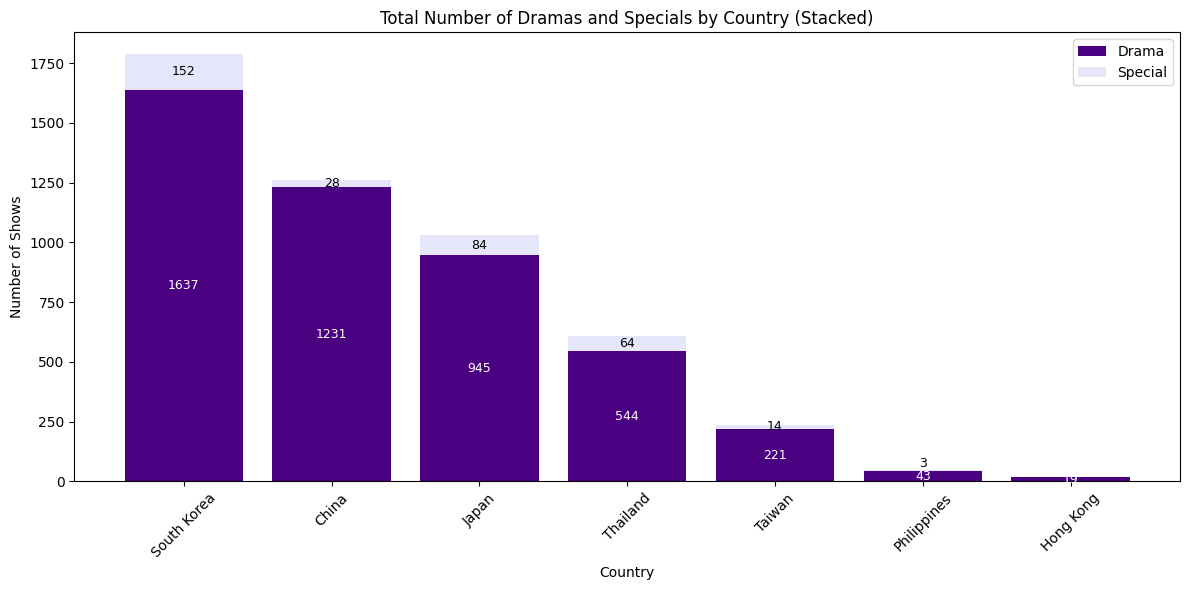

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of Dramas and Specials by country
country_type_counts = asian_dramas_5000.groupby(['country', 'type_of_show']).size().unstack(fill_value=0)

# Separate the counts for Drama and Special
drama_counts = country_type_counts['Drama']
special_counts = country_type_counts['Special']

# Sort by total shows in descending order
sorted_countries = (drama_counts + special_counts).sort_values(ascending=False).index
drama_counts = drama_counts[sorted_countries]
special_counts = special_counts[sorted_countries]

# Create the positions for the bars
x = range(len(sorted_countries))

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x, drama_counts, label='Drama', color='#4B0082')  # Dark purple (indigo)
bars2 = plt.bar(x, special_counts, bottom=drama_counts, label='Special', color='#E6E6FA')  # Pale purple (lavender)

# Add the numbers for each portion with dynamic positioning
for i in range(len(x)):
    # Drama count
    if drama_counts.iloc[i] > 0:  # Add text only if Drama count is non-zero
        if drama_counts.iloc[i] > 5:  # If bar height is large enough, display inside
            plt.text(
                x[i], drama_counts.iloc[i] / 2,
                int(drama_counts.iloc[i]),
                ha='center', va='center', color='white', fontsize=9
            )
        else:  # For small bars, display text above the bar
            plt.text(
                x[i], drama_counts.iloc[i] + 1,
                int(drama_counts.iloc[i]),
                ha='center', va='bottom', color='black', fontsize=9
            )

    # Special count
    if special_counts.iloc[i] > 0:  # Add text only if Special count is non-zero
        if special_counts.iloc[i] > 5:  # If bar height is large enough, display inside
            plt.text(
                x[i], drama_counts.iloc[i] + special_counts.iloc[i] / 2,
                int(special_counts.iloc[i]),
                ha='center', va='center', color='black', fontsize=9
            )
        else:  # For small bars, display text above the bar
            plt.text(
                x[i], drama_counts.iloc[i] + special_counts.iloc[i] + 1,
                int(special_counts.iloc[i]),
                ha='center', va='bottom', color='black', fontsize=9
            )

# Add labels, title, and legend
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Total Number of Dramas and Specials by Country (Stacked)')
plt.xticks(x, sorted_countries, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


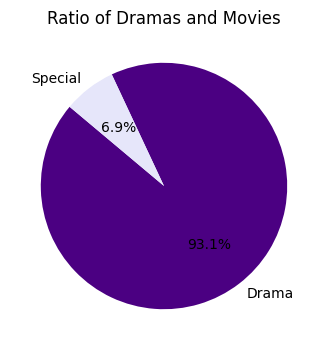

In [ ]:
import matplotlib.pyplot as plt

# Check if the 'type_of_show' column exists in the dataset
if 'type_of_show' in asian_dramas_5000.columns:
    # Count the occurrences of each type (e.g., Drama, Movie)
    type_counts = asian_dramas_5000['type_of_show'].value_counts()

    # Define custom colors in shades of purple
    colors = ['#4B0082', '#E6E6FA']  # Dark purple for Drama, pale purple for Special/Movie

    # Plot the pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Ratio of Dramas and Movies')
    plt.show()
else:
    print("Column 'type_of_show' not found in the dataset.")



In [ ]:
import pandas as pd
import plotly.express as px

# Group the data by country and year, and count the number of shows
shows_per_country_year = (
    asian_dramas_5000.groupby(['country', 'year']).size().reset_index(name='count')
)

# Filter the data to include only years from 1994 onwards
shows_per_country_year = shows_per_country_year[shows_per_country_year['year'] >= 1994]

# Create an interactive line chart
fig = px.line(
    shows_per_country_year,
    x='year',  # X-axis
    y='count',  # Y-axis
    color='country',  # Line colors based on country
    title='Number of Shows Per Country Per Year (From 1994)',
    labels={'year': 'Year', 'count': 'Number of Shows', 'country': 'Country'},
)

# Update layout for better readability
fig.update_layout(
    hovermode='x unified',  # Show hover information for all countries at once
    legend_title_text='Country',
    xaxis=dict(title='Year', tickmode='linear', range=[1994, shows_per_country_year['year'].max()]),  # Adjust range
    yaxis=dict(title='Number of Shows'),
)

# Show the interactive chart
fig.show()


The graph shows the rise in drama production across South Korea, China, Japan, Thailand, Taiwan, and the Philippines from 1994 to 2023. South Korea saw explosive growth post-2010, peaking in 2021 due to the global K-Drama wave (Hallyu), streaming platforms, and high-budget productions (Descendants of the Sun, Squid Game). China and Japan maintained steady growth, with China peaking in 2021, driven by local demand and streaming expansion. Thailand and Taiwan saw rising trends post-2015 due to international interest in BL dramas and idol-driven content. A sharp decline in 2022-2023 suggests a shift to quality over quantity and industry slowdowns post-pandemic.

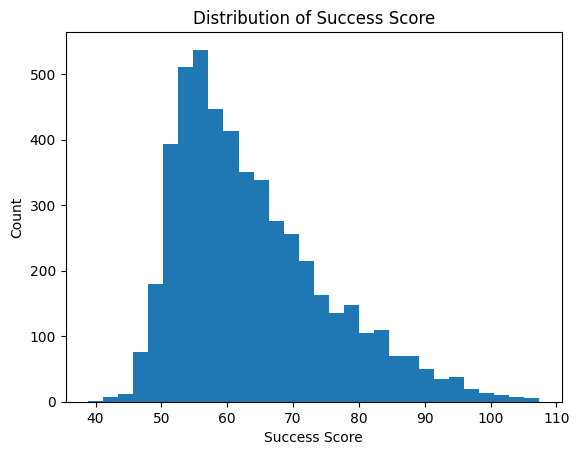

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['success_score'], bins=30)
plt.xlabel('Success Score')
plt.ylabel('Count')
plt.title('Distribution of Success Score')
plt.show()


# Sucess Prediciton of the drama

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
cleaned_data = pd.read_excel("/content/KDRAMA PROJECT CLEANED DATA.xlsx")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define the target variable (Success Score)
cleaned_data['success_score'] = cleaned_data['rating'] * np.log(cleaned_data['no_of_viewers'] + 1)

# Select relevant features **(avoid using rating & no_of_viewers)**
features = ['no_of_reviews', 'episodes', 'country', 'type_of_show']

# One-hot encode categorical features
categorical_features = ['country', 'type_of_show']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(cleaned_data[categorical_features])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Merge with numerical features
X = pd.concat([cleaned_data[features].drop(columns=categorical_features), encoded_df, genre_matrix], axis=1)

# Drop rows with missing values
X = X.dropna()
y = cleaned_data.loc[X.index, 'success_score']

# Train-Test Split (Ensure Proper Shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Regressor with Controlled Depth
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute accuracy within ±10% of actual success score
tolerance = 0.1
accurate_predictions = np.abs(y_pred - y_test) <= (tolerance * y_test)
accuracy = np.mean(accurate_predictions) * 100  # Convert to percentage

# Print Accuracy
print(f"Model Accuracy: {accuracy:.2f}%")

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Accuracy: 80.04%

Model Evaluation Metrics:
Mean Absolute Error (MAE): 3.9202
Mean Squared Error (MSE): 25.0922
R² Score: 0.8015


**1. Model and Features:**

Model Used: Random Forest Regression

Target Variable: Success Score = rating × log(no_of_viewers + 1)

Features: no_of_reviews, episodes, country, type_of_show, and genre encoding


**2. Why Random Forest Regression?**

Captures nonlinear relationships and feature interactions automatically.

Robust to outliers and handles categorical features well.

Performs better than Linear Regression for complex data.


**3. Train-Test Split & Model Details:**

Train-Test Split: 80% training, 20% testing.

Model Parameters: n_estimators=50, max_depth=5, random_state=42.

One-hot encoding applied to categorical features.


**4. Results Obtained:**

Model Accuracy: 80.04% (within ±10% of actual success score).

MAE: 3.92, MSE: 25.09, R² Score: 0.8015.

Explains 80% of variance in success scores.

In [ ]:
### Newly added changes:###

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Load the dataset
cleaned_data = pd.read_excel("/content/KDRAMA PROJECT CLEANED DATA (1).xlsx")

In [2]:

# Define the target variable (Success Score)
cleaned_data['success_score'] = cleaned_data['rating'] * np.log(cleaned_data['no_of_viewers'] + 1)

# Select relevant numerical features (excluding rating & no_of_viewers)
features = ['no_of_reviews', 'episodes']  # Only numerical features remain

# Extract feature matrix and target variable
X = cleaned_data[features].dropna()
y = cleaned_data.loc[X.index, 'success_score']

# Train-Test Split (Ensure Proper Shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Function to determine optimal depth using cross-validation
def find_optimal_depth(X_train, y_train):
    depths = range(1, 21)  # Testing depths from 1 to 20
    scores = []

    for depth in depths:
        model = RandomForestRegressor(n_estimators=50, max_depth=depth, random_state=42)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')  # 5-fold CV for R² score
        scores.append(np.mean(cv_scores))

    optimal_depth = depths[np.argmax(scores)]
    return optimal_depth, scores

# Determine optimal depth
optimal_depth, depth_scores = find_optimal_depth(X_train, y_train)

# Train Random Forest with optimal depth
optimal_model = RandomForestRegressor(n_estimators=50, max_depth=optimal_depth, random_state=42)
optimal_model.fit(X_train, y_train)

# Predictions
y_train_pred = optimal_model.predict(X_train)
y_test_pred = optimal_model.predict(X_test)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation scores on training data
cv_mae = cross_val_score(optimal_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mse = cross_val_score(optimal_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(optimal_model, X_train, y_train, cv=5, scoring='r2')

# Compute Mean Scores
cv_mae_mean = -np.mean(cv_mae)
cv_mse_mean = -np.mean(cv_mse)
cv_r2_mean = np.mean(cv_r2)

In [3]:
import matplotlib.pyplot as plt

# Print results one after the other
print(f"Optimal Depth of Each Tree: {optimal_depth}\n")

print("Training Data Results:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"R² Score: {r2_score(y_train, y_train_pred):.4f}\n")

print("Testing Data Results:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"R² Score: {r2_score(y_test, y_test_pred):.4f}\n")

print("Cross-Validation Results on Training Data:")
print(f"Cross-Validated Mean Absolute Error (MAE): {cv_mae_mean:.4f}")
print(f"Cross-Validated Mean Squared Error (MSE): {cv_mse_mean:.4f}")
print(f"Cross-Validated R² Score: {cv_r2_mean:.4f}\n")


Optimal Depth of Each Tree: 6

Training Data Results:
Mean Absolute Error (MAE): 3.9077
Mean Squared Error (MSE): 25.6095
Root Mean Squared Error (RMSE): 5.0606
R² Score: 0.8050

Testing Data Results:
Mean Absolute Error (MAE): 4.2690
Mean Squared Error (MSE): 29.6261
Root Mean Squared Error (RMSE): 5.4430
R² Score: 0.7656

Cross-Validation Results on Training Data:
Cross-Validated Mean Absolute Error (MAE): 4.1236
Cross-Validated Mean Squared Error (MSE): 28.7240
Cross-Validated R² Score: 0.7805



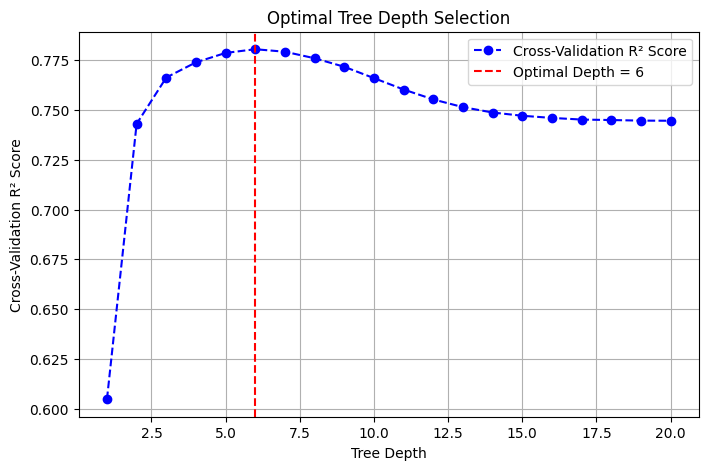

In [4]:
# Plot optimal depth selection
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), depth_scores, marker='o', linestyle='dashed', color='b', label="Cross-Validation R² Score")
plt.axvline(optimal_depth, color='r', linestyle='--', label=f'Optimal Depth = {optimal_depth}')
plt.xlabel("Tree Depth")
plt.ylabel("Cross-Validation R² Score")
plt.title("Optimal Tree Depth Selection")
plt.legend()
plt.grid(True)
plt.show()

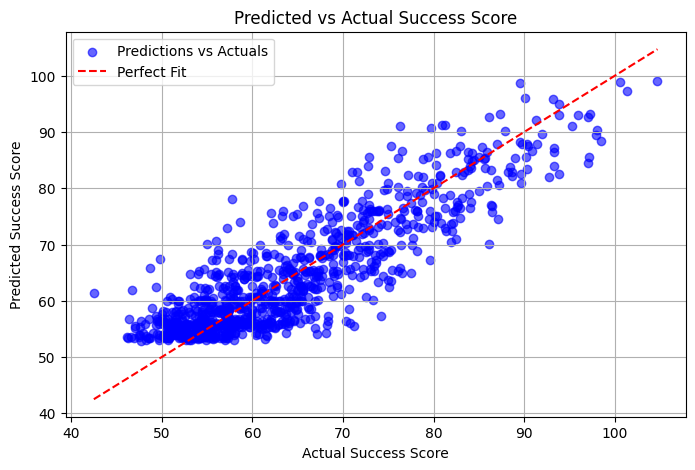

In [5]:
# Confusion Matrix Plot (since it's regression, we use residuals instead)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, color="blue", alpha=0.6, label="Predictions vs Actuals")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Fit")
plt.xlabel("Actual Success Score")
plt.ylabel("Predicted Success Score")
plt.title("Predicted vs Actual Success Score")
plt.legend()
plt.grid(True)
plt.show()